Epoch 1/10
235/235 - 4s - loss: 0.6992 - accuracy: 0.0019 - val_loss: 0.6991 - val_accuracy: 0.0013
Epoch 2/10
235/235 - 3s - loss: 0.6988 - accuracy: 0.0019 - val_loss: 0.6987 - val_accuracy: 0.0013
Epoch 3/10
235/235 - 3s - loss: 0.6984 - accuracy: 0.0018 - val_loss: 0.6984 - val_accuracy: 0.0013
Epoch 4/10
235/235 - 3s - loss: 0.6981 - accuracy: 0.0018 - val_loss: 0.6980 - val_accuracy: 0.0012
Epoch 5/10
235/235 - 3s - loss: 0.6978 - accuracy: 0.0018 - val_loss: 0.6977 - val_accuracy: 0.0012
Epoch 6/10
235/235 - 3s - loss: 0.6974 - accuracy: 0.0018 - val_loss: 0.6974 - val_accuracy: 0.0011
Epoch 7/10
235/235 - 3s - loss: 0.6971 - accuracy: 0.0018 - val_loss: 0.6971 - val_accuracy: 0.0011
Epoch 8/10
235/235 - 3s - loss: 0.6968 - accuracy: 0.0019 - val_loss: 0.6968 - val_accuracy: 0.0011
Epoch 9/10
235/235 - 3s - loss: 0.6965 - accuracy: 0.0018 - val_loss: 0.6965 - val_accuracy: 0.0011
Epoch 10/10
235/235 - 3s - loss: 0.6962 - accuracy: 0.0018 - val_loss: 0.6962 - val_accuracy: 0.0013

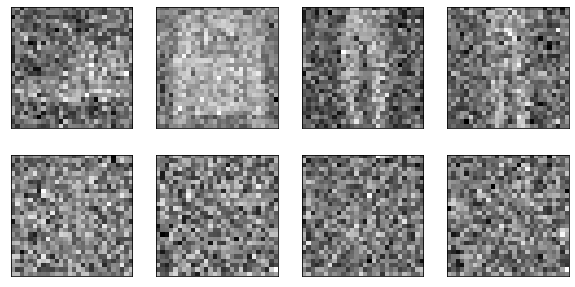

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


# introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=5,
                          verbose=2,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_noisy))

Encoding_image = encoder.predict(x_test_noisy)
Decoding_image = decoder.predict(Encoding_image)
import matplotlib.pyplot as plt
#This is the ploted image 
n = 4  
p1 = plt.figure(figsize=(10, 5))
for i in range(n):
    #This is the original one
    A = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    A.get_xaxis().set_visible(False)
    A.get_yaxis().set_visible(False)

    # This is the reconstruction figure 
    A = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    A.get_xaxis().set_visible(False)
    A.get_yaxis().set_visible(False)
plt.show()